<a href="https://colab.research.google.com/github/katiesalas/data_analytics_2/blob/main/Unit3_Python_Advanced_Pandas_DataWrangling_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 : Python Data Analysis using salaries dataset

# Data Exploration:  This should include summary statistics, means, medians, quartiles, or any other relevant information about the data set. 

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/Salaries.csv')

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
# 397 rows = 397 employees
df.shape

(397, 7)

In [ ]:
df.head()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500


In [ ]:
df.tail()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329
396,397,AsstProf,A,8,4,Male,81035


In [ ]:
df.describe()

,Unnamed: 0,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000,397.000000
mean,199.000000,22.314861,17.614610,113706.458438
std,114.748275,12.887003,13.006024,30289.038695
min,1.000000,1.000000,0.000000,57800.000000
25%,100.000000,12.000000,7.000000,91000.000000
50%,199.000000,21.000000,16.000000,107300.000000
75%,298.000000,32.000000,27.000000,134185.000000
max,397.000000,56.000000,60.000000,231545.000000


# Mean/median of all salaries

In [ ]:
# Mean of all salaries
df['salary'].mean()

113706.45843828715

In [ ]:
# Median of all salaries
df['salary'].median()

107300.0

# Median salary between gender and/or rank(title) Etc...


Making a new Data Frame that only has the columns 'sex' and 'salary'

In [ ]:
df2 = df [['sex', 'salary']]
print(df2)

      sex  salary
0    Male  139750
1    Male  173200
2    Male   79750
3    Male  115000
4    Male  141500
..    ...     ...
392  Male  103106
393  Male  150564
394  Male  101738
395  Male   95329
396  Male   81035

[397 rows x 2 columns]


Finding the Median salary for all males

In [ ]:
df2[df2['sex'] == 'Male']['salary'].median()


108043.0

Finding the Median salary for all females

In [ ]:
df2[df2['sex'] == 'Female']['salary'].median()

103750.0

Comparing the Mean salary of Males and Females

In [ ]:
f = df2[df2['sex'] == 'Female']['salary'].mean()
m = df2[df2['sex'] == 'Male']['salary'].mean()
print ("The average salary for men is " + str(m) + ". The average salary for women is " + str(f) + ".")

The average salary for men is 115090.41899441341. The average salary for women is 101002.41025641025.


In [ ]:
# The difference between mean salaries of male and female
m-f

14088.008738003162

# Data Wrangling – perform some basic transformations on the data

People who have 20 years of experience (Total: 157), (Mean Salary: 122,520.66)

In [ ]:
df3 = df[['yrs.service', 'salary']]
print (df3[df3['yrs.service'] >= 20]['salary'].mean())
df3[df3['yrs.service'] >= 20]['salary'].count()

122520.65605095541


157

Comparing the salaries of people who have 20+ years of experience vs less than 20 years of experience

In [ ]:
df3[df3['yrs.service'] <= 20]['salary'].mean()

108768.776

In [ ]:
exp = df3[df3['yrs.service'] >= 20]['salary'].mean()
new = df3[df3['yrs.service'] <= 20]['salary'].mean()
exp - new

13751.880050955413

People who have salary of greater than or equal to 200,000

In [ ]:
df[df['salary'] >= 200000]

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
43,44,Prof,B,38,38,Male,231545
249,250,Prof,A,29,7,Male,204000
364,365,Prof,A,43,43,Male,205500


Your Findings here...


# Rename values, subset columns, etc

In [ ]:
df.columns

Index(['order', 'rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex',
       'salary'],
      dtype='object')

In [ ]:
df.rename(columns = {'order': 'id'}, inplace = True)
df.columns

Index(['id', 'rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex',
       'salary'],
      dtype='object')

In [ ]:
df.iloc[10:15,1:4]

,rank,discipline,yrs.since.phd
10,AssocProf,B,12
11,AsstProf,B,7
12,AsstProf,B,1
13,AsstProf,B,2
14,Prof,B,20


In [ ]:
df[df.sex == 'Female']

,order,rank,discipline,yrs.since.phd,yrs.service,sex,salary
9,10,Prof,B,18,18,Female,129000
19,20,Prof,A,39,36,Female,137000
24,25,AssocProf,A,13,8,Female,74830
34,35,AsstProf,B,4,2,Female,80225
35,36,AsstProf,B,5,0,Female,77000
47,48,Prof,B,23,19,Female,151768
48,49,Prof,B,25,25,Female,140096
52,53,AsstProf,B,11,3,Female,74692
63,64,AssocProf,B,11,11,Female,103613
68,69,Prof,B,17,17,Female,111512


In [ ]:
f_count = df2[df2.sex == 'Female']['sex'].count()
m_count = df2[df2.sex == 'Male']['sex'].count()
ratio = f_count/m_count * 100

print(f_count, m_count, ratio)

39 358 10.893854748603351


# Create some simple visualizations showing some simple statistics

In [ ]:
import seaborn as sns
%matplotlib inline

Text(0.5, 1.0, 'Salary Distribution')

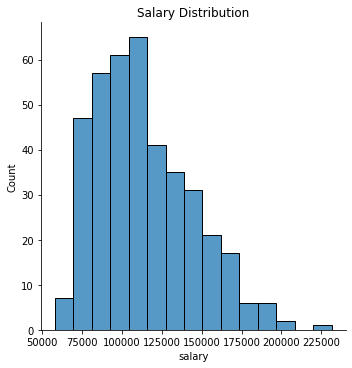

In [ ]:
sns.displot(df['salary'])
plt.title('Salary Distribution')

Text(0.5, 1.0, 'Average Salaries for Men vs Women')

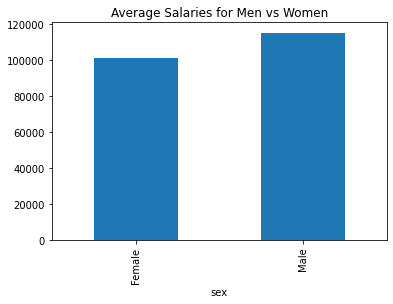

In [ ]:
df.groupby('sex')['salary'].mean().plot(kind = 'bar')
plt.title('Average Salaries for Men vs Women')

Text(0.5, 1.0, 'Average Years of Service for Men vs Women')

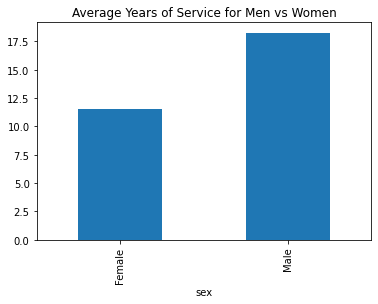

In [ ]:
df.groupby('sex')['yrs.service'].mean().plot(kind = 'bar')
plt.title('Average Years of Service for Men vs Women')

Text(0.5, 1.0, 'Number of Women and Men Employed')

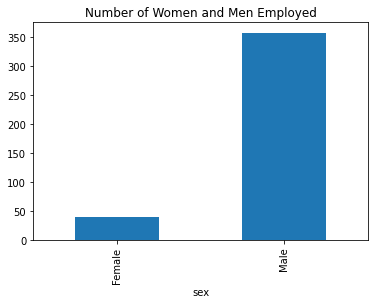

In [ ]:
df.groupby('sex')['salary'].count().plot(kind = 'bar')
plt.title('Number of Women and Men Employed')

Text(0.5, 1.0, 'Distribution Plot for Men vs Women')

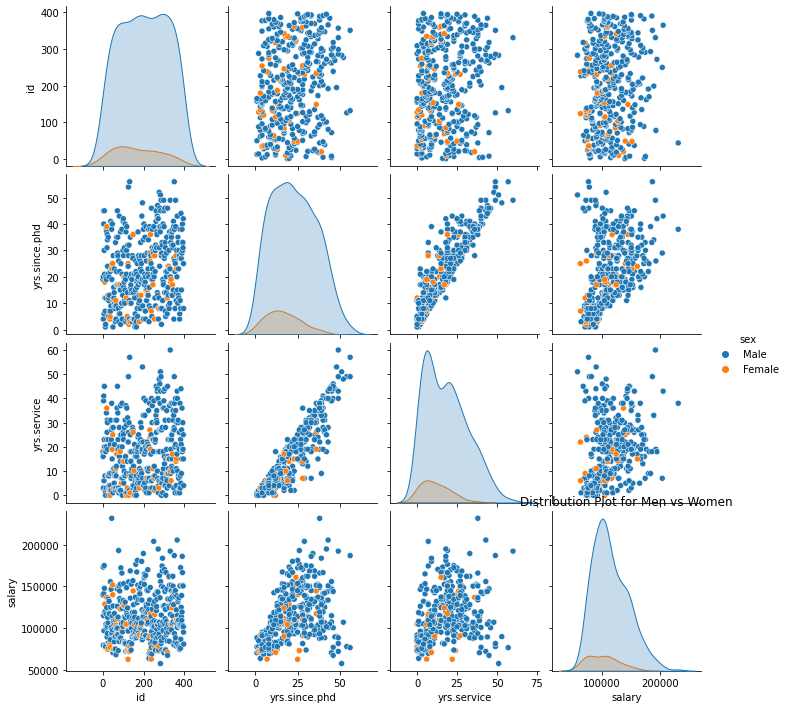

In [ ]:
sns.pairplot(df, hue = 'sex')
plt.title('Distribution Plot for Men vs Women')

Your observations from the visuals: 

# Draw some conclusions based on the data.  What did you discover?

Based on the analysis performed above, the conclusions are as follows:

Your Findings here...



I also discovered that the -

 Your Findings here...





The data gives information about a group of 397 employees. Less than 11% are women. By finding the averages of salaries of the different sexes we see that women make roughly $14,000 less. From the second bar graph we see that men have more years of experience than women. We could come to the conclusion that more men are hired or there are less women in the field. New information from the National Womens Law Center says that 100% of jobs lost in December were women, specifically women of color, while men gained 16,000 jobs. This could also explain the data from our data set. Men have more experience because they get hired more often and more experience can lead to higher salaries. 